## Joby John Week 8 



### Video Presentation



### Assignment

In this week's assignment, you are asked to analyze high frequency words.
Please answer the fo llowing questions in an Jupyter Notebook, posted to GitHub.
1.	Choose a corpus of interest.
2.	How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way).
3.	Taking the most common words, how many unique words represent half of the total words in the corpus?Identify the 200 highest frequency words in this corpus.
4.	Create a graph that shows the relative frequency of these 200 words.
5.	Does the observed relative frequency of these words follow Zipf’s law? Explain.
6.	In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

----


In [1]:
import nltk
import pandas as pd
from nltk.corpus import gutenberg
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


### (1) Choose a corpus of interest.

The text 'melville-moby_dick.txt' contains <b>260819</b> words

In [2]:
moby = gutenberg.words('melville-moby_dick.txt')
 
len(moby)

260819

There are <b>19317</b> unique words. 

In [3]:

len(set(moby))
 

19317

### (2) How many total unique words are in the corpus?  
(Please feel free to define unique words in any interesting, defensible way).

we will define unique word as : anything that is more than 2 alphabetic characters long and that is not a stop word. 



In [4]:
print('Total Number of words :  {}'.format(len(moby)))
# Stopwords
stop_words = stopwords.words('english')

 
# keep only alphabetic characters
alpha_words = [word.lower() for word in moby if word.isalpha()]


print('Total Number of alphabetic words :  {}'.format(len(alpha_words)))

# Remove stopwords
words = [w for w in alpha_words if w not in stop_words]

 

print('Total Number of words after removing stopwords :  {}'.format(len(words)))

 
unique_finalWords = set([word for word in words if len(word)>2])

print('Total Number of words with 2 or more characters(unique) :  {}'.format(len(unique_finalWords)))
lessthanThreewords = set([word for word in words if len(word)<=2])
print('Total Number of words with 2 or less characters :  {}'.format(len(lessthanThreewords)))
 
 

Total Number of words :  260819
Total Number of alphabetic words :  218361
Total Number of words after removing stopwords :  110459
Total Number of words with 2 or more characters(unique) :  16742
Total Number of words with 2 or less characters :  60


Below table shows words that are two characters long. 

In [5]:
print(lessthanThreewords)

{'mt', 'ha', 'te', 'nt', 'de', 'le', 'f', 'sw', 'us', 'fa', 'st', 'w', 'h', 'bo', 'ob', 'et', 'wa', 'en', 'go', 'oh', 'e', 'la', 'ox', 'er', 'ne', 'c', 'io', 'ay', 'x', 'vi', 'em', 'ee', 'p', 'fe', 'u', 'os', 'n', 'lo', 'iv', 'ho', 'l', 'ye', 'lt', 'co', 'ii', 'um', 'se', 'ge', 'g', 'si', 'dr', 'tu', 'da', 'eh', 'mr', 'ka', 'ah', 'j', 'ex', 'v'}


There are 16742  unique words in the Moby-Dick text after removing stopwords and two character words. Originally, the text had 19317 unique words. 

### (3) Taking the most common words, how many unique words represent half of the total words in the corpus?

In [6]:
fdist = nltk.FreqDist(words)
fdist 

FreqDist({'whale': 1226, 'one': 921, 'like': 647, 'upon': 566, 'man': 527, 'ship': 518, 'ahab': 511, 'ye': 472, 'sea': 455, 'old': 450, ...})

There are 110459 words (non unique), half of this is 55229.5

In [7]:
print(len(words))
print(len(words)/2)

110459
55229.5


In [8]:
#Create Cumulative Frequency Table
df_all_words = pd.DataFrame(words)
df_all_words.columns = ['word']
df_all_words_freq = pd.DataFrame(df_all_words['word'].value_counts()).reset_index(drop=False)
df_all_words_freq.columns = ['word', 'frequency']
df_all_words_freq['cumulative_frequency'] = df_all_words_freq['frequency'].cumsum()
df_all_words_freq.sort_values(by='frequency', ascending=False).head()

,word,frequency,cumulative_frequency
0,whale,1226,1226
1,one,921,2147
2,like,647,2794
3,upon,566,3360
4,man,527,3887


### There are 258 words that represent about half of the total words. 

In [9]:
len(df_all_words_freq[df_all_words_freq['cumulative_frequency'] <= 130409])

16802

In [10]:
half = df_all_words_freq[df_all_words_freq['cumulative_frequency'] <= 130409.5]
print(len(half))
half.head()

16802


,word,frequency,cumulative_frequency
0,whale,1226,1226
1,one,921,2147
2,like,647,2794
3,upon,566,3360
4,man,527,3887


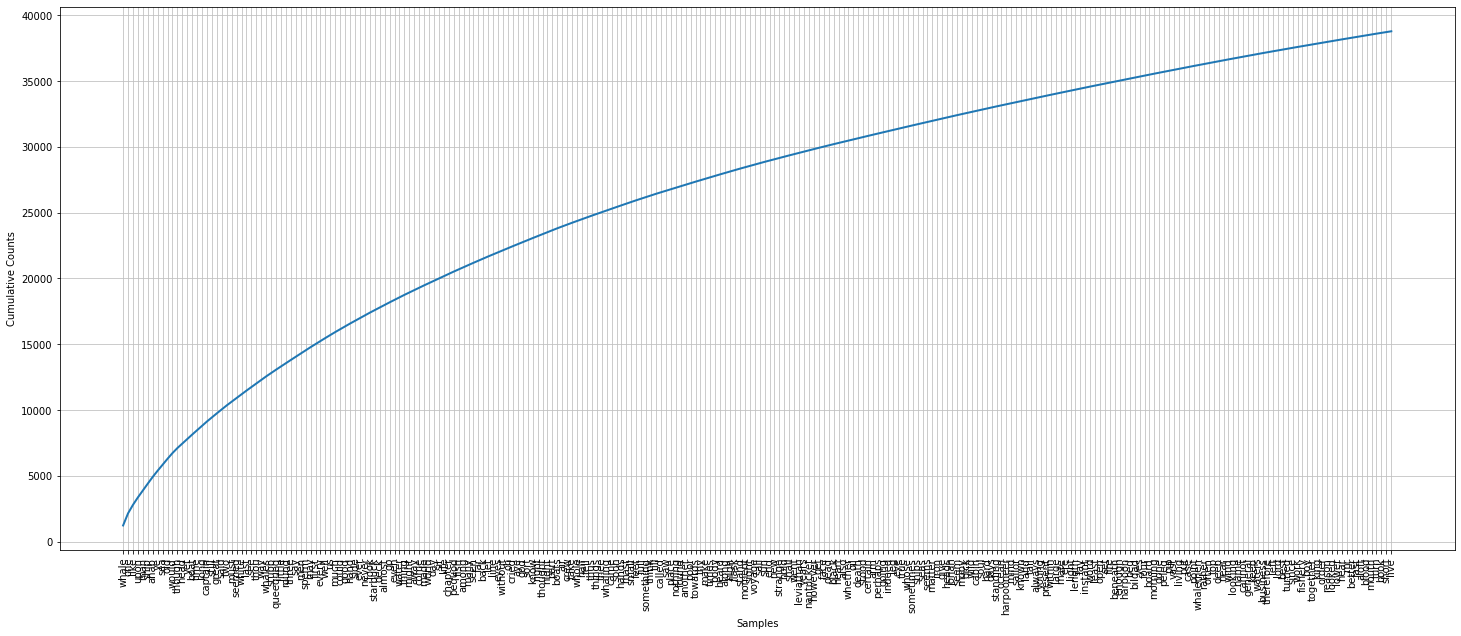

In [11]:
plt.figure(3,figsize=(25,10)) 
#%matplotlib inline
fdist.plot(258, cumulative=True)

###  Identify the 200 highest frequency words in this corpus.

In [12]:
top_words = fdist.most_common(200)


top_wordsdf = pd.DataFrame(top_words, columns = ['word', 'freq'])

#relative frequency
top_wordsdf['relative_freq'] = top_wordsdf['freq']/top_wordsdf['freq'].sum()
top_wordsdf 


,word,freq,relative_freq
0,whale,1226,0.035219
1,one,921,0.026457
2,like,647,0.018586
3,upon,566,0.016259
4,man,527,0.015139
5,ship,518,0.014880
6,ahab,511,0.014679
7,ye,472,0.013559
8,sea,455,0.013071
9,old,450,0.012927


### (4) Create a graph that shows the relative frequency of these 200 words.

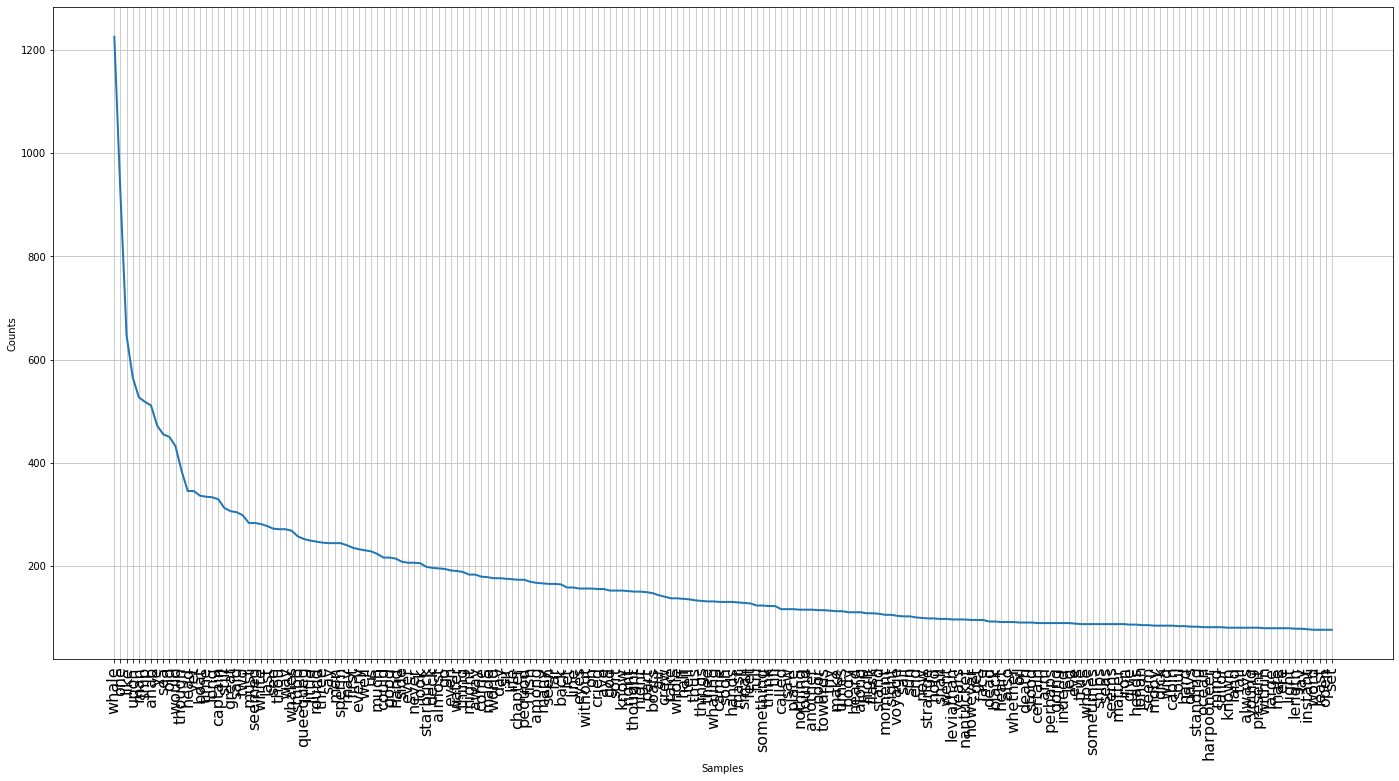

In [13]:
plt.figure(figsize=(24, 12))
plt.rc('xtick', labelsize=16) 
fdist.plot(200)

### (5) Does the observed relative frequency of these words follow Zipf’s law? Explain.

In the English language, the probability of encountering the nth most common word is given roughly by P(r)=0.1/n. 

Based on the plot below, we see that 200 most common words roughly follow Zipf's law.

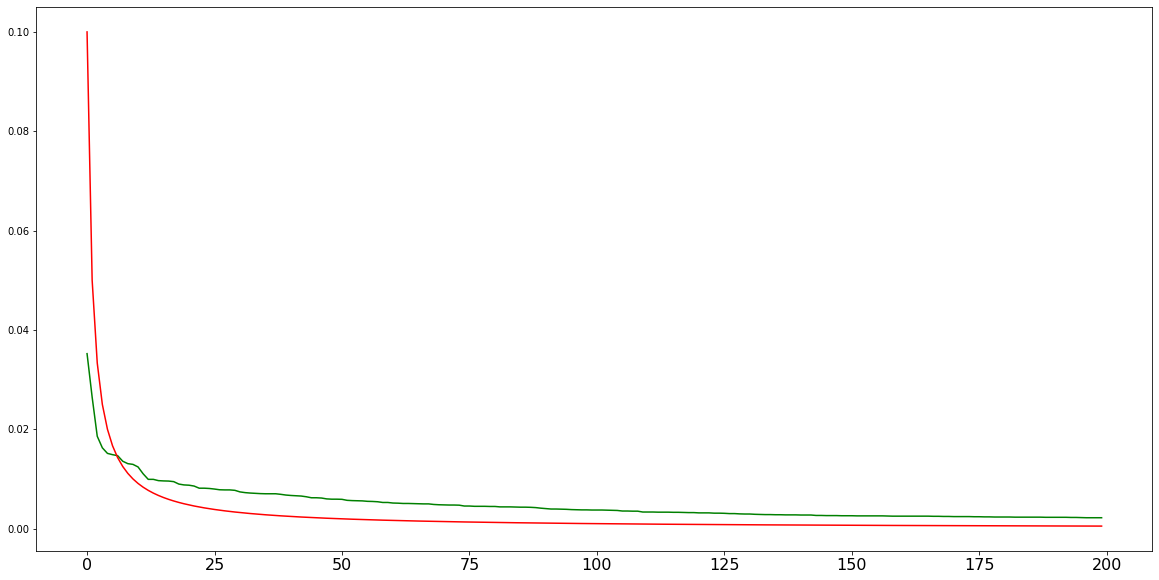

In [14]:
 
top_wordsdf = top_wordsdf.reset_index(drop=False)
top_wordsdf['z_proab'] = 0.1/(top_wordsdf['index'] + 1)
plt.figure(3,figsize=(20,10))
plt.plot(top_wordsdf['relative_freq'], 'green')
plt.plot(top_wordsdf['z_proab'], 'red')
plt.show()

### (6) In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Frequency of the words in a specific text could differ from the frequency of "all words in all corpora" based on the author and the subject. Some authors might use a set of words more frequently than other authors. Another way would be the by topic/subject. For example, this text uses the word 'Whale' a lot but a book about physiscs or math probably will never the term 'Whale'.

